# Fitting a Straight Line to Data
Before we start discussing linear regression more formally, it is worthwhile spending some time gaining intuition about what a linear regression model is trying to achieve. For some of you, linear regression will be familiar and this will largely be revision. However, even if you already feel confident about this, it is worth reading through this section to make sure all the basics are understood before we progress. If this is unfamiliar, or if you do not feel confident, make sure you take your time working through this section before we start formalising things later in this lesson.

## Describing a Relationship with a Line
As explained last week, one of the main reasons for modelling data is to *simplify* the complex relationships between variables. If we can express these relationships in a simple form then we can reduce all the information across $n$ measurements of $k$ variables into just a handful of numbers. Those numbers can then be used to both *explain* the process that generated the data, as well as allowing for *prediction* of unmeasured values.

In many real-world cases, the simplest relationship we can define is given by a *straight line*. As an example, if we again use the `mtcars` data and plot `wt` against `mpg`, we have the pattern shown below.

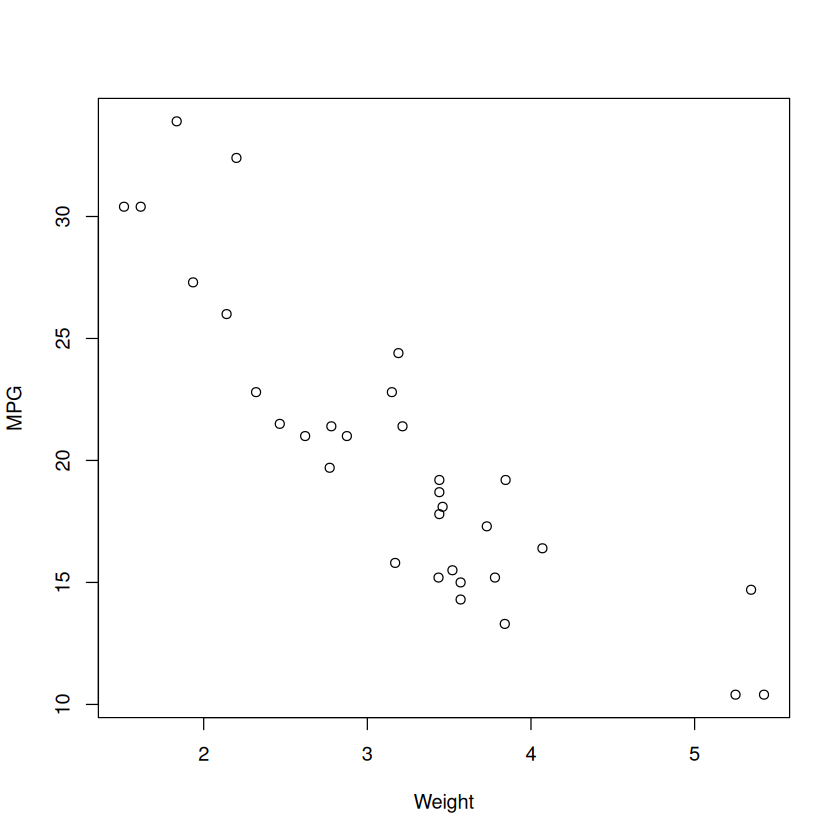

In [1]:
data(mtcars)
plot(x=mtcars$wt, y=mtcars$mpg, xlab="Weight", ylab="MPG")

As `wt` increases there is clear *decrease* in the value of `mpg`. Although the relationship is not perfect, we could probably do a fairly good job of capturing this by simply drawing a line through the cloud of the datapoints. Although this line may only intersect a few of the measured datapoints, the hope would be that, in some sense, the line captures the *general pattern* we can see in the data. 

An example of such a line is shown below. For the moment, do not worry about how this has been defined or the numbers that have been used. The main point is just gaining intuition for *why* we would want to do this.

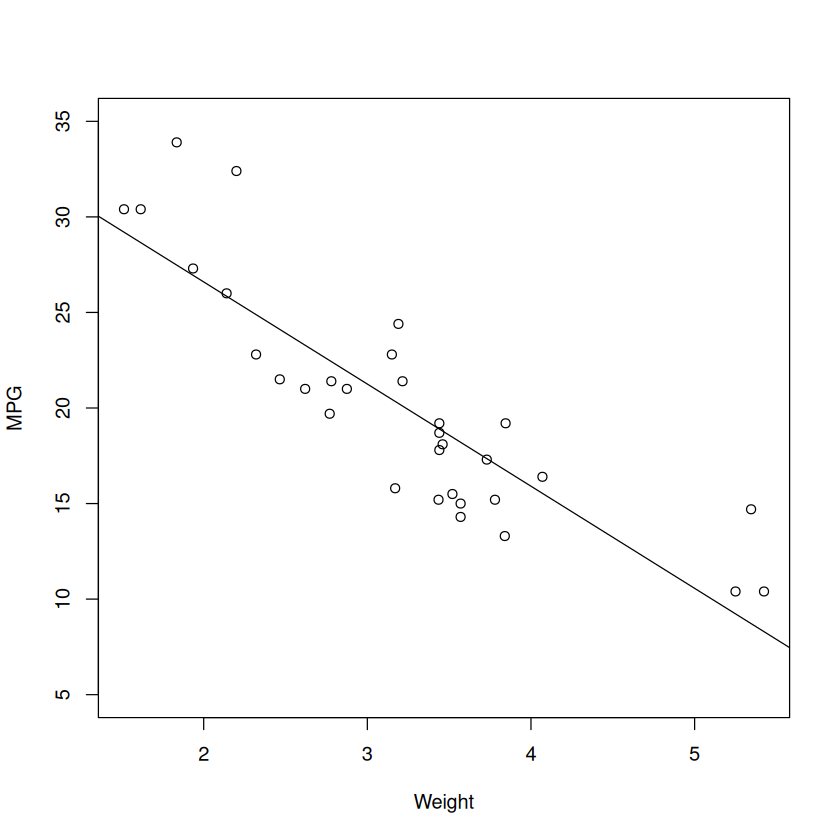

In [2]:
plot(x=mtcars$wt, y=mtcars$mpg, xlab="Weight", ylab="MPG", ylim=c(5,35))
abline(coef=c(37.2851,-5.3445))

This line does appear to do a good job of capturing the general pattern we can see in the data. As a means of summarising the data, the line intersects some data points, whereas others are further away. Neverthless, in a very general sense, this seems a reasonable summary that captures the essence of the fact that as weight increases, MPG decreases. Furthermore, there are points on this line that have no corresponding data (e.g. between `wt` measurements of 4 and 5). As such, these elements of the line represent a *prediction* about what value of MPG we would expect for those particular values of weight. 

## The Straight Line Equation
In order to fully appreciate how a straight line provides a *simplification* of the data, we need to examine how a straight line is defined mathematically. The classic algebraic expression of a line is

$$
y = mx + b,
$$

where $x$ and $y$ have their usual interpretations, $m$ is the *slope* of the line and $b$ is the *intercept*. For our `mtcars` example, this would be

$$
\text{MPG} = m \times \text{Weight} + b.
$$

Understanding this equation can be made simpler by conceptualising it as instructions for how far to climb up the $y$-axis, after walking a certain distance along the $x$-axis. We always start our walk from an $x$-value of 0. The intercept, $b$, tells us how far we need to climb up $y$ before we start walking. For the line we showed above, we start from $x = 0$ and $y = b = 37.2851$. So, we need to climb all the way up to a value of $37.2851$ before we start walking. The slope then tells us how far we would need to climb up $y$ if we take *one step* along the $x$-axis. For the line shown above, we had $m = -5.3445$. So, if we move along the $x$-axis by one unit of `wt`, then we need to move *down* the $y$-axis by $5.3445$. For any other distance, we can simply multiply how far we are walking by the value of $m$. For instance, if we walked 2-units along $x$ we would have $m \times 2 = -10.689$, whereas if we move only half a unit we would have $m \times 0.5 = -2.6723$. 

Given the information above, knowing the $y$-value of a line only depends upon *three* pieces of information: the *intercept* (our starting point), the *slope* (how $y$ changes for a single unit change in $x$) and $x$ (how far we are actually walking). In the context of our example, we already know the values of $x$ as these are given by the `wt` variable. As such, there are only *two* values we need to choose ($b$ and $m$). Importantly, once we have values for both the intercept and slope, we have effectively reduced all the information in the data to *two numbers*. For the `mtcars` example, we have therefore gone from 32 values of `mpg` and 32 values of `wt` to only two summary values. These two numbers capture everything we need to know about the *general* relationship in the data.

## Finding the "Best" Line
In the example above, the values of $b$ and $m$ were already given. However, in any real-world analysis, these will be unknown. As such, we need to consider *how* we find reasonable values for these parameters. This requires some rule for determining which line we think is "best" for capturing the relationship in our data. 

In general, we want this line to be as *close* to our data as possible. In other words, we want the average distance from the data points to the line to be as *small* as possible. These distances are shown in the plot below for the line we used earlier.

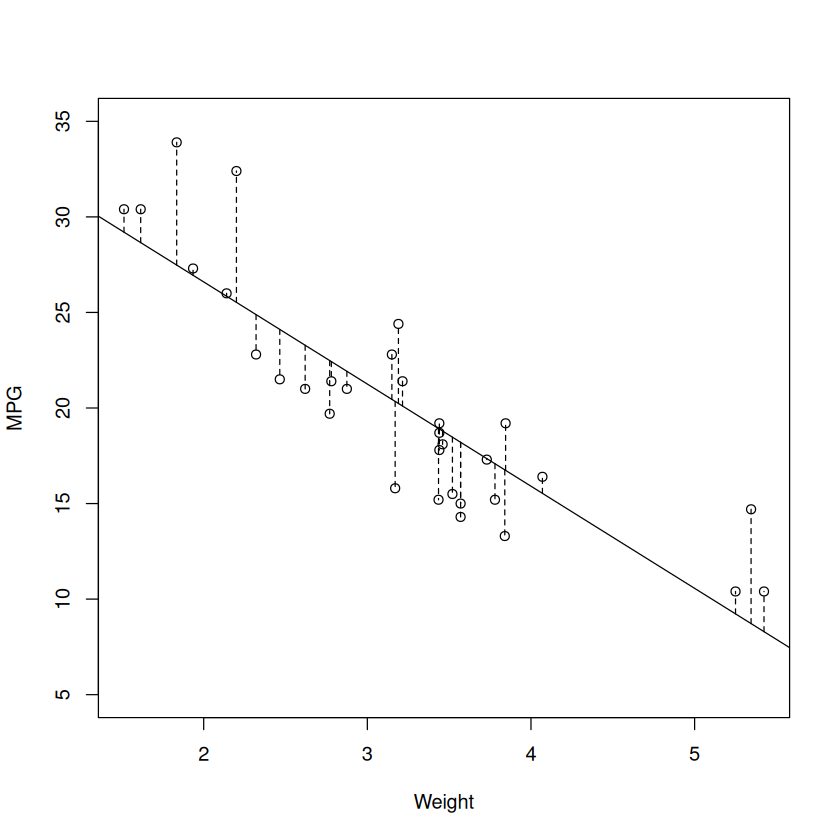

In [4]:
# plot data and line
b <- 37.2851 # intercept
m <- -5.3445 # slope
plot(x=mtcars$wt, y=mtcars$mpg, xlab="Weight", ylab="MPG", ylim=c(5,35))
abline(coef=c(b,m))

# draw vertical dashed lines for each data point
for (i in 1:length(mtcars$mpg)){
    x.start <- mtcars$wt[i]
    x.end   <- mtcars$wt[i]
    y.start <- m * mtcars$wt[i] + b
    y.end   <- mtcars$mpg[i]
    lines(x=c(x.start,x.end), y=c(y.start,y.end), lty=2)
}

Does this picture look familiar? If you remember from last week, we used the same form of visualisation when we were exploring the concept of *variance*. The only difference now is that our reference point is no longer the mean of the data, it is the *regression line*. So, if we want a line that minimises these vertical distances, what we are really looking for is a line that *minimises the variance around the regression line*. 

If we define the *expected values* of $y$ to be the straight line equation, then $\text{Var}(y)$ precisely captures these vertical distances. To see this formally, we can take

$$
E(y) = mx + b.
$$

The variance of $y$ is then given by

$$
\begin{align*}
    \text{Var}(y) &= E\left[\left(y - E\left[y\right]\right)^{2}\right] \\ 
                  &= E\left[\left(y - \left[mx + b\right]\right)^{2}\right],
\end{align*}
$$

which should be familiar from last week. As also discussed last week, subtracting an expectation from the raw data produces a quantity known as the *errors*. The variance therefore captures the value of the *mean squared errors* (MSE). As we know, the errors are centred around 0 so that, in the context of a straight-line, removing the expectation produces the following

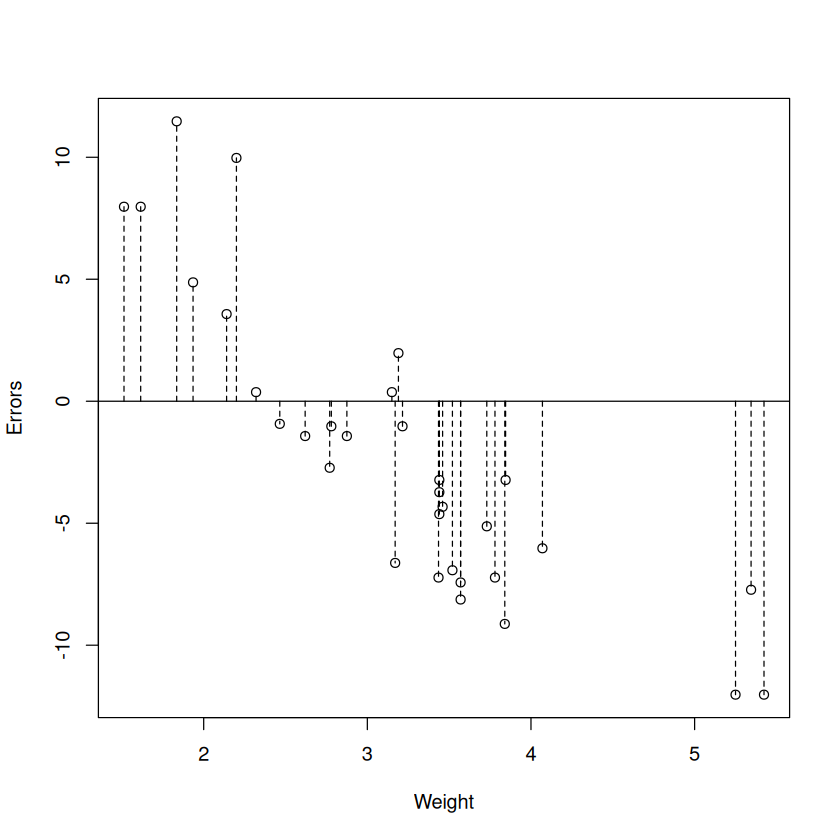

In [5]:
# line parameters
b   <- 37.2851 # intercept
m   <- -5.3445 # slope

# subtract the line from the data
err <-  mtcars$mpg - (m*mtcars$wt[i] + b) # errors = data - (mx+b)

# plot data and line
plot(x=mtcars$wt, y=err, xlab="Weight", ylab="Errors")
abline(h=0)
for (i in 1:length(mtcars$mpg)){
    x.start <- mtcars$wt[i]
    x.end   <- mtcars$wt[i]
    y.start <- 0
    y.end   <- err[i]
    lines(x=c(x.start,x.end), y=c(y.start,y.end), lty=2)
}

The errors are therefore deflections from the expected value which, in this case, is the regression line. The regression line that is *closest* to the data is the one that makes the average defection as small as possible. To stop the positive and negative deflections from cancelling when we calculate the average, we typically *square* these values. As such, we are looking for a line that minimises the *squared* distances, as shown below.

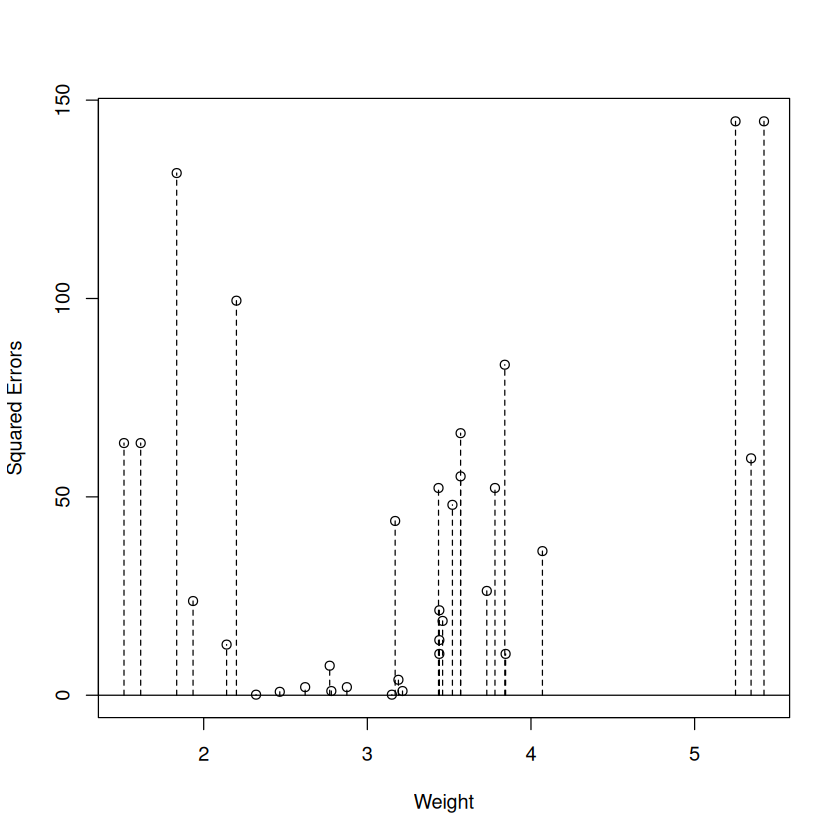

In [6]:
b      <- 37.2851                            # intercept
m      <- -5.3445                            # slope
err    <-  mtcars$mpg - (m*mtcars$wt[i] + b) # errors
sq.err <- err^2

plot(x=mtcars$wt, y=sq.err, xlab="Weight", ylab="Squared Errors")
abline(h=0)
for (i in 1:length(mtcars$mpg)){
    x.start <- mtcars$wt[i]
    x.end   <- mtcars$wt[i]
    y.start <- 0
    y.end   <- sq.err[i]
    lines(x=c(x.start,x.end), y=c(y.start,y.end), lty=2)
}

As we can see above, squaring is a useful thing to do because it makes all values *positive* and makes larger deflections *more extreme*. This means that not all data are treated equally when finding a line. Instead, the regression line is weighted towards making larger deflections smaller. The only downside of this is that if there are very extreme points (known as *outliers*) then the line may be unduly influenced by those individual points. We will come back to this point later on the unit. 

`````{admonition} Minimising Variance
:class: tip
The main point to take away from this is that finding the "best" line is an exercise in minimising variance. If we remember from last week that the aim of a statistical model is to split the *total* variation in the data into multiple parts, what we are really doing is partitioning our original definition of variation into

$$
\sigma^{2}_{\text{Total}} = \sigma^{2}_{\text{Line}} + \sigma^{2}_{\text{Errors}}.
$$

So, we take the total amount of variance we can see in the data without taking anything else into account (i.e. using the mean as the expected value). We then split this value into the amount of variation we can explain using our model (i.e. using the regression line as the expected value) and the amount that is left over. Finding the best line is equivalent to making $\sigma^{2}_{\text{Line}}$ as *big* as possible, which will automatically make $\sigma^{2}_{\text{Errors}}$ as *small* as possible. Thus, minimising the errors partitions the *maximum* amount of variance from the total into the regression line, leaving us with as little error variance as possible.
`````

### Ordinary Least Squares
So, how do we find the line that minimises the errors? Later in this lesson we will look at the method of Maxmimum Likelihood, which can find this line based on *probability*. However, there is a simpler approach for regression models that leads to the same answer. This is known as *ordinary least squares* (OLS). As the name implies, the aim of least squares is to make the squared errors as small as possible. This involves minimising the *sum of squared errors* (SSE), which we can express as

$$
\begin{align*}
    \text{SSE} &= \sum_{i=1}^{n}\left(y - E\left[y\right]\right)^{2} \\ 
               &= \sum_{i=1}^{n}\left(y - \left[mx + b\right]\right)^{2} \\
               &= \sum_{i=1}^{n}\epsilon_{i}^{2}
\end{align*}
$$

If you are unfamiliar with the $\Sigma$ notation, it is explained in the box below. Notice that this expression is basically *identical* to the expression for the variance around the regression line, except that it is not an *average* it is a *sum*[^sum-foot].

`````{admonition} Big Sigma Notation
:class: tip, dropdown
Big Sigma notation, denoted by the capitol Greek letter $\Sigma$, is used as a shorthand for *addition*. Below the big Sigma, we define our indexing variable, as well as its starting value. Above the big Sigma, we indicate the value where we stop. So the notation

$$
S = \sum_{j=1}^{3} x_{j}
$$

is equivalent to

$$
S = x_{1} + x_{2} + x_{3},
$$

In code, this is the same as shortening

```R
S <- x[1] + x[2] + x[3]
```

to

```R
S <- 0
for (j in 1:3){
    S <- S + x[j]
}
```
You can therefore think of the Big Sigma notation as a *summation loop* over a certain set of indices. Smetimes, in the interests of space, the summation indices are dropped and a sum is just written as $\sum{x_{j}}$. In these instances, the index and the range is *implied* rather than explicit. For instance, we would just assume that the sum runs across all values of $j$, given that this is the only index in the expression.
`````

So, how do we find the *minimum* SSE? This where the tools of calculus are need to find the minimum of a function. This is beyond the scope of this lesson (*and* unit, *and* course). However, we do not really need to understand the derivation. The only important practical point is that, for linear regression problems, a *closed-form solution* exists to find the line that minimises the SSE. What this means is that we do not need to use iterative algorithms to search for a solution amongst many possibilities. Instead, a *single set of equations* can be applied to any regression problem to find this line. These are given by

$$
\begin{align*}
    m &= \frac{\sum{\left(x_{i} - \bar{x}\right)\left(y_{i} - \bar{y}\right)}}{\sum{\left(x_{i} - \bar{x}\right)^{2}}}\\
    b &= \bar{y} - m\bar{x} \\ 
\end{align*}
$$

where $\bar{y}$ is the mean of $y$ and $\bar{x}$ is the mean of $x$. Again, we do not really need to dig into why this works, especially as we will be seeing a more general method for arriving at this result later. However, it can be useful to demonstrate that it *does* work using the `R` code below.

In [7]:
x <- mtcars$wt
y <- mtcars$mpg
m <- sum((x - mean(x))*(y - mean(y))) / sum((x - mean(x))^2) # slope estimate
b <- mean(y) - m * mean(x)                                   # intercept estimate

print(c(b,m))

[1] 37.285126 -5.344472


This produces the same values we saw earlier for both the intercept and the slope. As such, we have successfully estimated the line that best summarises these data in terms of minimising the sum-of-squared errors. This is the *least-squares line*.

`````{topic} What do you now know?
In this section, we have explored the general idea of capturing the relationship between two variables by fitting a straight line to the data. After reading this section, you should have a good sense of:

- How a line can be used to *simplify* and *summarise* the pattern you can see when plotting one variable against another.
- How a line can be described mathematically using the expression $y = mx + b$.
- How finding the "best" line can be achieved by minimising the sum of squared errors between the line and the raw data.
- How this exericse in minimisation relates to the concept of *variance* and how closed-form solutions to this problem are known as the method of Ordinary Least Squres (OLS).
`````

[^sum-foot]: The reasons for using a sum rather than an average are actually a bit complicated. We will come back to this in later lessons on ANOVA models. If you are returning here after the ANOVA lessons, it should now be clearer why OLS works on partitioning the sums-of-squares, rather than the sample variance. If this is your first time reading this lesson, do not worry about this detail for now.